In [1]:
import pandas as pd
import seaborn as sns

# Load train logs

In [2]:
train_logs = pd.read_csv('../input/linking-writing-processes-to-writing-quality/train_logs.csv')
train_logs.head()

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


# Data shape

In [3]:
train_logs.shape

(8405898, 11)

# Data types

In [4]:
train_logs.dtypes

id                 object
event_id            int64
down_time           int64
up_time             int64
action_time         int64
activity           object
down_event         object
up_event           object
text_change        object
cursor_position     int64
word_count          int64
dtype: object

# NaN values

In [5]:
train_logs.isna().sum()

id                 0
event_id           0
down_time          0
up_time            0
action_time        0
activity           0
down_event         0
up_event           0
text_change        0
cursor_position    0
word_count         0
dtype: int64

# Total number of logs

In [6]:
train_logs['id'].nunique()

2471

# Events size dist

<Axes: >

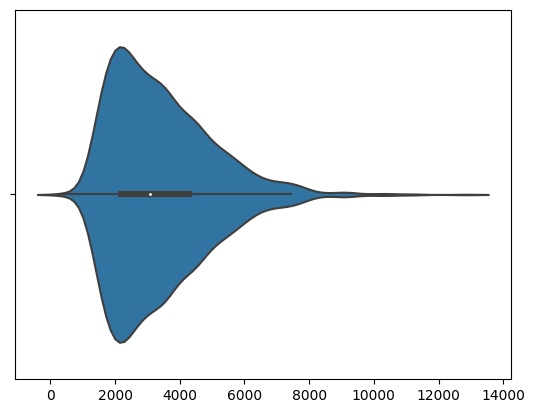

In [7]:
logID2size = train_logs.groupby('id').size()
sns.violinplot(x=logID2size)

# min/mean/median/max event size

In [8]:
logID2size.min(), logID2size.mean(), logID2size.median(), logID2size.max()

(262, 3401.8203156616755, 3082.0, 12876)

# Action time dist (global)

<Axes: xlabel='action_time'>

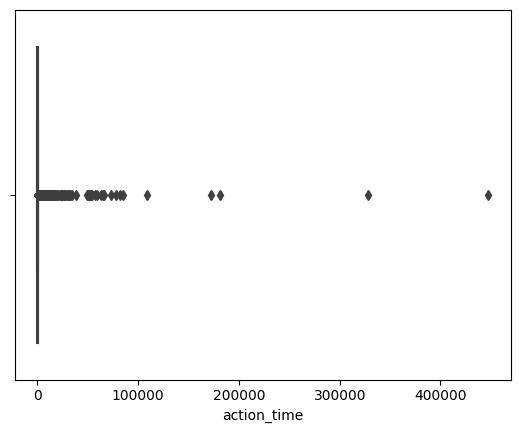

In [9]:
sns.boxplot(data=train_logs, x='action_time')

# Activity types dist

<Axes: xlabel='activity_clean', ylabel='count'>

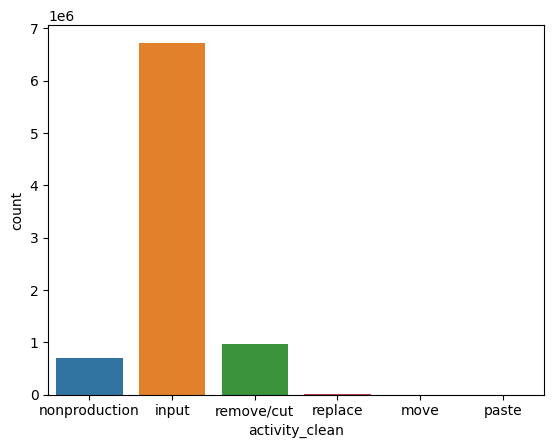

In [10]:
train_logs['activity_clean'] = train_logs['activity'].apply(lambda x: x.lower() if 'Move From' not in x else 'move')
sns.countplot(data=train_logs, x='activity_clean')

# Down events

In [11]:
train_logs['down_event'].value_counts(normalize=True).sort_values(ascending=False)

down_event
q             6.382803e-01
Space         1.436049e-01
Backspace     1.146920e-01
Shift         3.976101e-02
ArrowRight    1.443486e-02
                  ...     
¡             1.189641e-07
Å            1.189641e-07
Â´            1.189641e-07
Pause         1.189641e-07
F6            1.189641e-07
Name: proportion, Length: 131, dtype: float64

# Up events

In [12]:
train_logs['up_event'].value_counts(normalize=True).sort_values(ascending=False)

up_event
q             6.382172e-01
Space         1.436049e-01
Backspace     1.146920e-01
Shift         3.976101e-02
ArrowRight    1.443486e-02
                  ...     
F1            1.189641e-07
k             1.189641e-07
Pause         1.189641e-07
Â´            1.189641e-07
F6            1.189641e-07
Name: proportion, Length: 130, dtype: float64

# Number of events where up_event != down_event

In [13]:
sum(train_logs['down_event'] != train_logs['up_event'])

534

# Last event word count

<Axes: xlabel='word_count'>

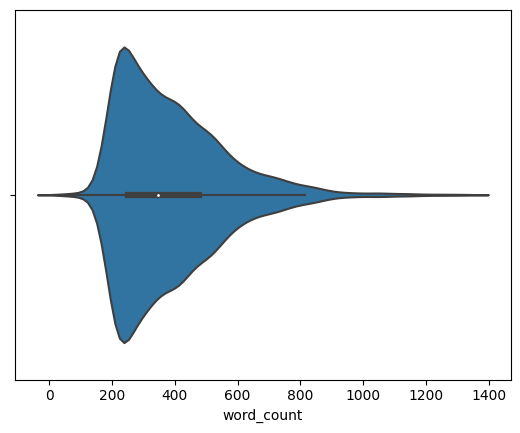

In [14]:
sns.violinplot(data=train_logs.groupby('id').tail(1), x='word_count')

# Max word count

<Axes: xlabel='word_count'>

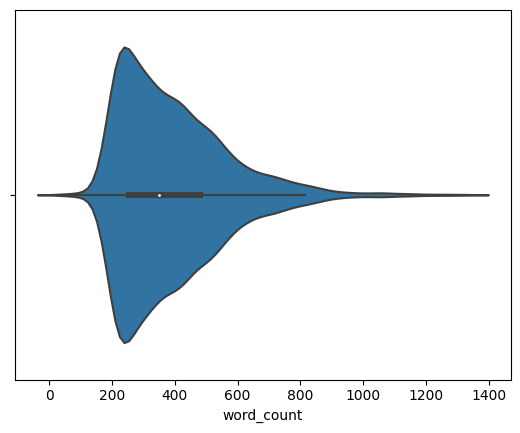

In [15]:
sns.violinplot(data=train_logs[['id', 'word_count']].groupby('id').max(), x='word_count')

# Cursor position

<Axes: xlabel='cursor_position'>

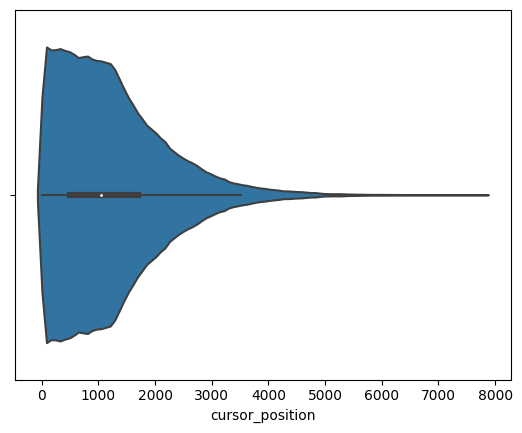

In [16]:
sns.violinplot(data=train_logs, x='cursor_position')